In [3]:
import pandas as pd

# Load the extracted features
df = pd.read_csv("features.csv")

# Display first few rows
print(df.head())


                                           file_path     mfcc_1     mfcc_2  \
0  C:\Users\LENOVO\OneDrive\Desktop\مهنة\PROJECT ... -670.19543  65.063850   
1  C:\Users\LENOVO\OneDrive\Desktop\مهنة\PROJECT ... -660.23035  63.325817   
2  C:\Users\LENOVO\OneDrive\Desktop\مهنة\PROJECT ... -661.96450  66.655870   
3  C:\Users\LENOVO\OneDrive\Desktop\مهنة\PROJECT ... -657.72235  65.035190   
4  C:\Users\LENOVO\OneDrive\Desktop\مهنة\PROJECT ... -694.57960  72.531715   

     mfcc_3     mfcc_4    mfcc_5    mfcc_6    mfcc_7    mfcc_8     mfcc_9  \
0  0.888954  14.715979  9.182164  0.660575 -3.846836 -3.583946 -12.959006   
1 -2.630457  17.983355  9.407703 -0.981498 -2.324697 -6.848032 -14.133670   
2 -0.932158  14.899042  5.324703  0.474343 -3.346651 -7.102525 -12.873403   
3  3.148672  15.666511  7.582657  2.628087 -1.850069 -7.477579 -11.976265   
4  3.104562  17.112118  9.077339  1.836256 -4.146086 -4.797151 -11.764123   

    mfcc_10   mfcc_11   mfcc_12   mfcc_13  emotion  
0 -3.300133  0.

In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Convert emotions to numerical values
df["emotion"] = encoder.fit_transform(df["emotion"])

# Display mapping of emotions
emotion_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Emotion Mapping:", emotion_mapping)


Emotion Mapping: {'Angry': np.int64(0), 'Calm': np.int64(1), 'Disgusted': np.int64(2), 'Fearful': np.int64(3), 'Happy': np.int64(4), 'Neutral': np.int64(5), 'Sad': np.int64(6), 'Surprised': np.int64(7)}


In [5]:
# Drop file_path column since it's not needed for training
X = df.drop(columns=["file_path", "emotion"])  
y = df["emotion"]


In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the feature data
X = scaler.fit_transform(X)


In [7]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1152, 13)
Testing data shape: (288, 13)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed performance report
print(classification_report(y_test, y_pred))



Accuracy: 0.40625
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        42
           1       0.39      0.50      0.44        44
           2       0.42      0.47      0.44        32
           3       0.39      0.47      0.43        32
           4       0.30      0.29      0.30        34
           5       0.27      0.15      0.19        20
           6       0.31      0.33      0.32        39
           7       0.35      0.29      0.32        45

    accuracy                           0.41       288
   macro avg       0.40      0.39      0.39       288
weighted avg       0.41      0.41      0.40       288



In [9]:
pip install seaborn



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
#model training using logistic regression

from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print model accuracy (how well it predicts)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.40625


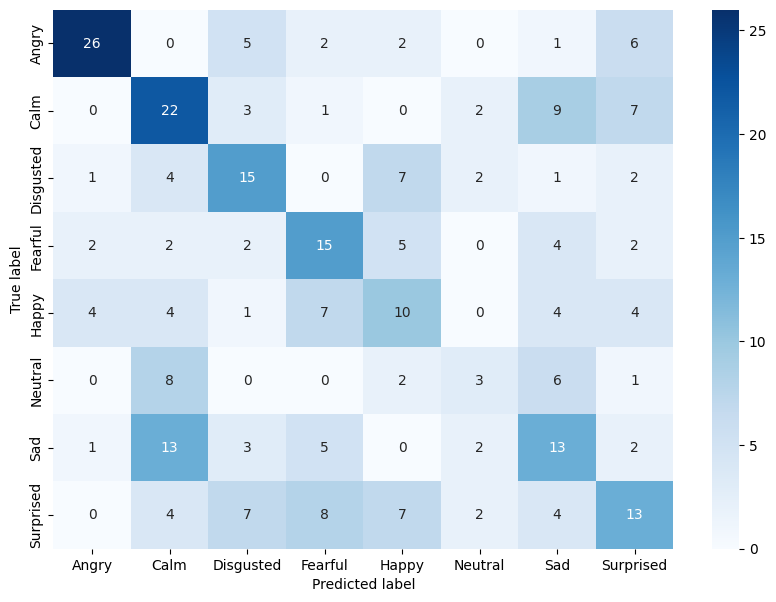

In [11]:
# model evaluation using confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the model
svm = SVC()

# Set up a parameter grid for tuning (example)
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Use GridSearchCV to search through the parameters
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'C': 10, 'kernel': 'rbf'}


In [13]:
import joblib

# Save the model to a file
joblib.dump(model, 'speech_emotion_model.pkl')

# To load the model later
model = joblib.load('speech_emotion_model.pkl')


In [14]:
pip install keyboard

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# it is optional not for beginners........

import pyaudio
import numpy as np
import librosa
import keyboard  # You need to install this library using 'pip install keyboard'

# Initialize microphone stream
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, channels=1, rate=16000, input=True, frames_per_buffer=1024)

while True:
    # Read audio data from microphone
    audio_chunk = np.frombuffer(stream.read(1024), dtype=np.int16)
    
    # Convert the audio data to floating point format (-1 to 1)
    audio_chunk = audio_chunk.astype(np.float32) / 32768.0
    
    # Extract MFCC features from the audio
    mfcc = librosa.feature.mfcc(y=audio_chunk, sr=16000, n_mfcc=13)  # Ensure 13 features
    mfcc_mean = np.mean(mfcc, axis=1)  # Take the mean of each MFCC
    
    # Check if the number of features matches the model's expectation (13)
    if len(mfcc_mean) != 13:
        print("Error: MFCC extraction did not return 13 features.")
        continue
    
    # Predict emotion using the trained model
    emotion = model.predict([mfcc_mean])  # Pass the correct number of features
    print("Predicted Emotion:", encoder.inverse_transform(emotion))
    
    # Stop condition: Check if 'q' key is pressed
    if keyboard.is_pressed('q'):  # Press 'q' to stop the loop
        print("Stopping the prediction.")
        break


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of lengt

Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of lengt

Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of lengt

Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Predicted Emotion: ['Neutral']
Stopping the prediction.


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(


In [16]:
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
